In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout 

In [3]:
import yfinance as yf 
import pandas as pd
import datetime as dt

# amazn_ticker = "AMZN" 
# start_date = dt.datetime.now() - dt.timedelta(days=6*365)
# end_date = dt.datetime.now()
# data = yf.download(amazn_ticker, start=start_date, end=end_date) 
# data.to_csv("AmazonStock_data.csv") 

# data.index = pd.to_datetime(data.index)
# print(data.head()) 

Amazon_Ticker = "AMZN"
Apple_Ticker = "AAPL"
Microsoft_Ticker = "MSFT"
Meta_Ticker = "META"
Google_Ticker = "GOOGL"

start_date = dt.datetime.now() - dt.timedelta(days = 6*365)
end_date = dt.datetime.now()
AmazonData = yf.download(Amazon_Ticker, start_date, end_date)
AmazonData.to_csv("AmazonStock.csv")

AppleData = yf.download(Apple_Ticker, start_date, end_date)
AppleData.to_csv("AppleStock.csv")

MicrosoftData = yf.download(Microsoft_Ticker, start_date, end_date)
MicrosoftData.to_csv("MicrosoftStock.csv")

MetaData = yf.download(Meta_Ticker, start_date, end_date)
MetaData.to_csv("MetaStock.csv")

GoogleData = yf.download(Google_Ticker, start_date, end_date)
GoogleData.to_csv("GoogleStock.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Amazon Stock Data

In [4]:
AmazonData.dropna(inplace=True)
AmazonData.index = pd.to_datetime(AmazonData.index)
print(AmazonData.head())
AmazonData.describe() 


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2017-03-16  42.764999  42.775002  42.525501  42.671001  42.671001  36846000
2017-03-17  42.674500  42.691502  42.532001  42.615501  42.615501  67688000
2017-03-20  42.575500  42.889999  42.550499  42.848499  42.848499  45654000
2017-03-21  42.942001  43.139999  42.065498  42.160000  42.160000  87658000
2017-03-22  42.021500  42.468498  41.952499  42.403000  42.403000  53174000


,Open,High,Low,Close,Adj Close,Volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,109.819747,111.118088,108.372490,109.758149,109.758149,8.398720e+07
std,40.366466,40.866341,39.812044,40.305013,40.305013,3.993251e+07
min,41.903500,42.468498,41.674999,42.160000,42.160000,1.762600e+07
25%,83.120003,84.093498,81.810997,83.157501,83.157501,5.743370e+07
50%,96.315498,97.248001,95.015503,96.050003,96.050003,7.239710e+07
75%,154.913498,156.644501,151.856995,154.474503,154.474503,9.872800e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.313000e+08


Apple Stock Data

In [5]:
AppleData.dropna(inplace=True)
AppleData.index = pd.to_datetime(AppleData.index)
print(AppleData.head())
AppleData.describe() 


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-03-16  35.180000  35.255001  35.064999  35.172501  33.008503   76928000
2017-03-17  35.250000  35.250000  34.972500  34.997501  32.844276  175540000
2017-03-20  35.099998  35.375000  35.057499  35.365002  33.189159   86168000
2017-03-21  35.527500  35.700001  34.932499  34.959999  32.809086  158119600
2017-03-22  34.962502  35.400002  34.939999  35.355000  33.179779  103440800


,Open,High,Low,Close,Adj Close,Volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,91.654606,92.746697,90.618043,91.727309,90.245160,1.141661e+08
std,47.803220,48.451115,47.173223,47.836354,48.231965,5.343717e+07
min,34.847500,35.250000,34.654999,34.959999,32.809086,3.519590e+07
25%,46.070000,46.537498,45.639999,46.107498,44.337353,7.876270e+07
50%,74.287498,75.360001,73.282501,74.597504,73.091782,9.938220e+07
75%,140.279999,142.240005,138.000000,140.419998,139.719849,1.335876e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,4.265100e+08


Microsoft Stock Data

In [6]:
MicrosoftData.dropna(inplace=True)
MicrosoftData.index = pd.to_datetime(MicrosoftData.index)
print(MicrosoftData.head())
MicrosoftData.describe()

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2017-03-16  64.750000  64.760002  64.300003  64.639999  59.754257  20674300
2017-03-17  64.910004  65.239998  64.680000  64.870003  59.966869  49219700
2017-03-20  64.910004  65.180000  64.720001  64.930000  60.022331  14598100
2017-03-21  65.190002  65.500000  64.129997  64.209999  59.356762  26640500
2017-03-22  64.120003  65.139999  64.120003  65.029999  60.114777  20680000


,Open,High,Low,Close,Adj Close,Volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,179.664506,181.523863,177.710457,179.705202,175.507195,2.919991e+07
std,80.416387,81.320332,79.456715,80.424971,81.244914,1.257551e+07
min,64.120003,64.760002,64.120003,64.209999,59.356762,7.425600e+06
25%,105.690002,107.000000,104.580002,105.739998,100.729645,2.133160e+07
50%,169.000000,172.919998,165.690002,168.070007,163.431641,2.618080e+07
75%,249.059998,251.479996,246.729996,249.419998,247.539993,3.342210e+07
max,344.619995,349.670013,342.200012,343.109985,339.075562,1.112421e+08


Meta Stock Data

In [7]:
MetaData.dropna(inplace=True)
MetaData.index = pd.to_datetime(MetaData.index)
print(MetaData.head()) 
MetaData.describe()

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-03-16  140.199997  140.250000  139.729996  139.990005  139.990005   
2017-03-17  140.339996  140.339996  139.699997  139.839996  139.839996   
2017-03-20  139.710007  140.190002  139.250000  139.940002  139.940002   
2017-03-21  141.149994  142.309998  138.399994  138.509995  138.509995   
2017-03-22  137.929993  139.789993  137.600006  139.589996  139.589996   

              Volume  
Date                  
2017-03-16  13612900  
2017-03-17  20592800  
2017-03-20  12099500  
2017-03-21  29894800  
2017-03-22  17055400  


,Open,High,Low,Close,Adj Close,Volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,208.627515,211.419086,205.946660,208.713115,208.713115,2.339793e+07
std,64.830897,65.506703,64.094611,64.800713,64.800713,1.632733e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,6.046300e+06
25%,165.830002,168.250000,163.720001,165.949997,165.949997,1.438500e+07
50%,185.830002,187.970001,183.710007,185.850006,185.850006,1.924570e+07
75%,249.039993,252.800003,246.610001,249.119995,249.119995,2.726690e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,2.323166e+08


Google Stock Data

In [8]:
GoogleData.dropna(inplace=True)
GoogleData.index = pd.to_datetime(GoogleData.index)
print(GoogleData.head()) 
GoogleData.describe()

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2017-03-16  43.526501  43.635502  43.375999  43.500000  43.500000  22090000
2017-03-17  43.683998  43.721001  43.418499  43.618500  43.618500  37366000
2017-03-20  43.473999  43.516998  43.233501  43.395500  43.395500  30844000
2017-03-21  43.502998  43.673500  42.384499  42.507000  42.507000  50760000
2017-03-22  42.473999  42.767502  42.349998  42.490002  42.490002  27334000


,Open,High,Low,Close,Adj Close,Volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,80.977732,81.861681,80.098297,80.998986,80.998986,3.509623e+07
std,30.970818,31.315700,30.582273,30.942932,30.942932,1.589219e+07
min,41.404499,42.069000,41.215000,41.757000,41.757000,9.312000e+06
25%,55.619499,56.178501,55.000000,55.577499,55.577499,2.515000e+07
50%,68.016998,68.800003,67.530502,68.126999,68.126999,3.104720e+07
75%,103.988503,105.331001,102.833504,104.440498,104.440498,4.000510e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.331780e+08


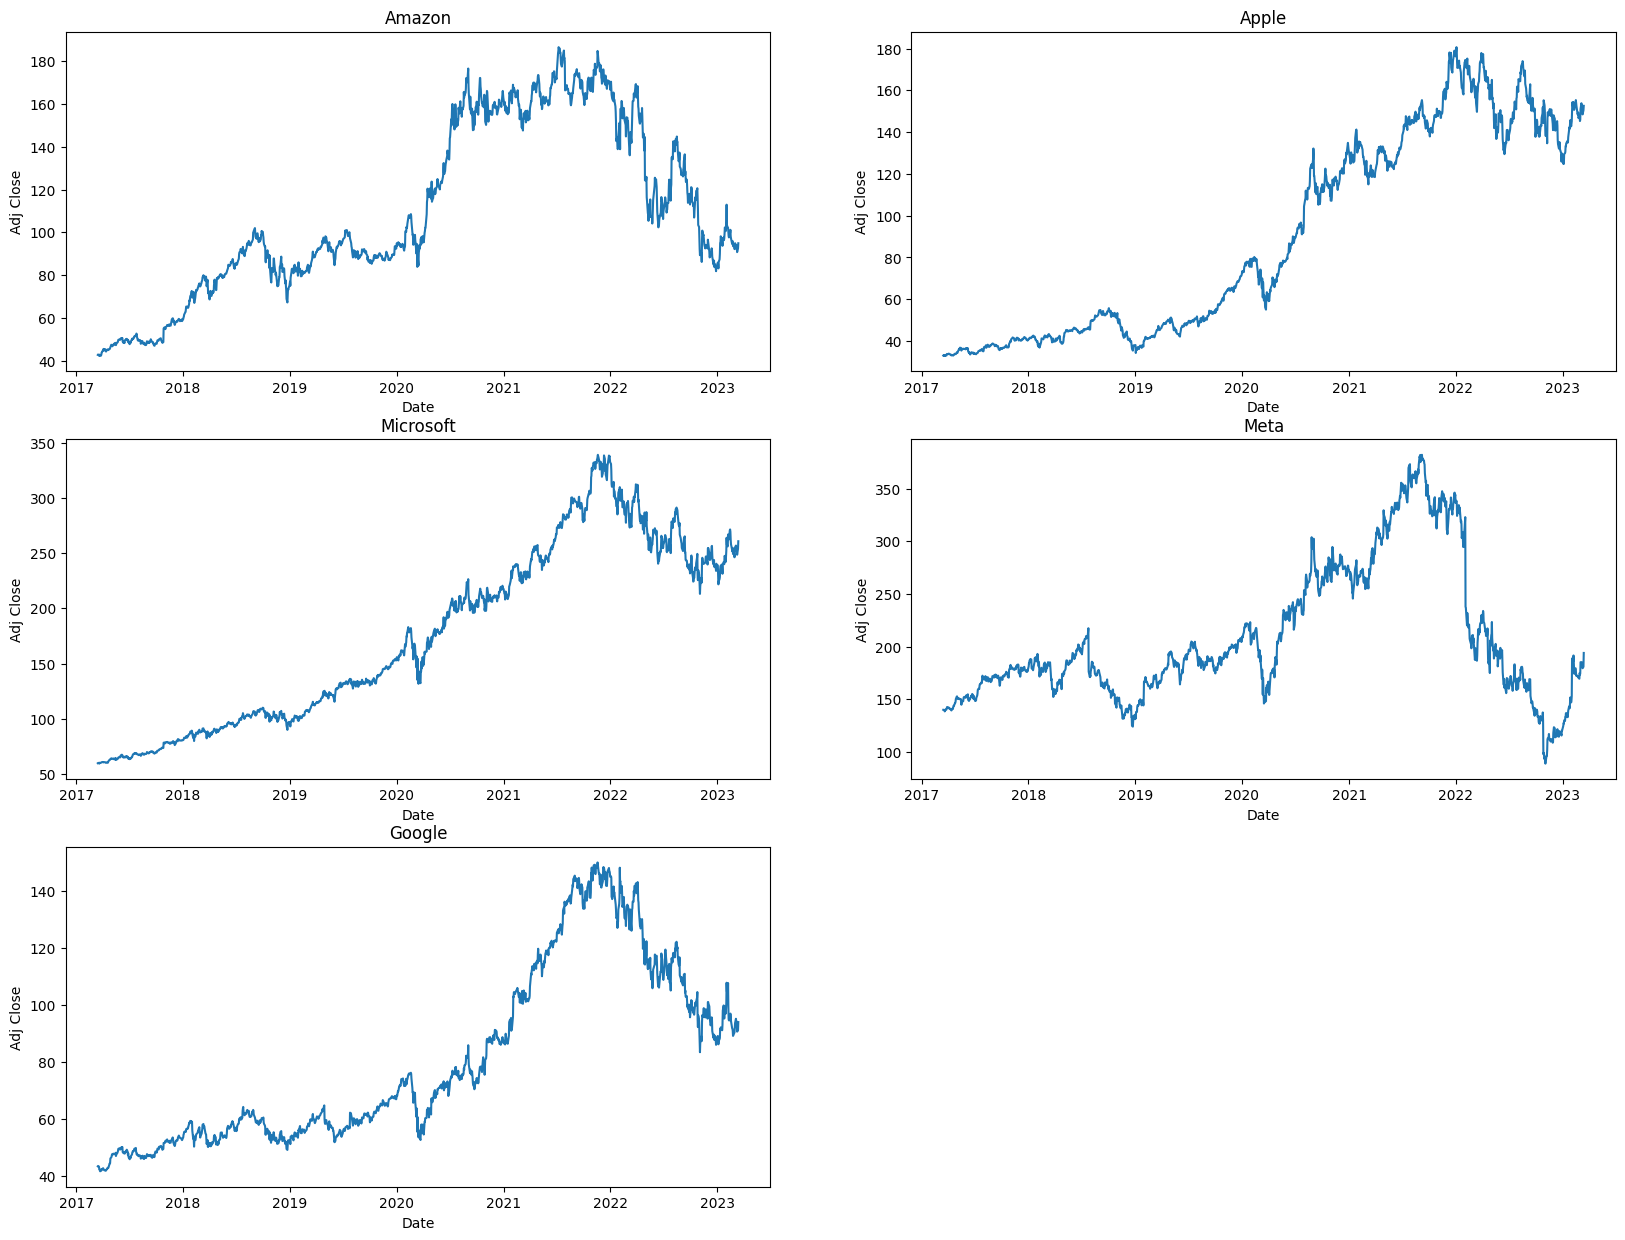

In [9]:
# #Data Analysis
# Company = [data]
# CompanyTitle = ['Amazon']

# #Historical View of the Closing Prices
# plt.figure(figsize =(20,7))
# for index, company in enumerate(Company):
#     plt.subplot(3,2, index +1)
#     plt.plot(company.index,company["Adj Close"])
#     plt.title(CompanyTitle[index])
#     plt.ylabel('Adj Close')
#     plt.xlabel('Date')

Company = [AmazonData, AppleData, MicrosoftData, MetaData, GoogleData]
Title = ["Amazon", "Apple", "Microsoft", "Meta", "Google"]

for company in Company:
    company['Date'] = company.index

# company = company.rename(columns={'<existing date column name>': 'Date'})


#Below is the plot for closing prices for the companies
plt.figure(figsize =(20,15))
for index, company in enumerate(Company):
    plt.subplot(3,2, index +1)
    plt.plot(company.index,company["Adj Close"])
    plt.title(Title[index])
    plt.ylabel('Adj Close')
    plt.xlabel('Date')


Information that we can Infer from eeing the above graphs:
1. The adjusted closing prices for each company have increased over time especially between the time period 2020-2021 (Covid 19)
2. Google has generally had the highest adjusted closing prices among the five companies, while Meta (formerly Facebook) has generally had the lowest.
3. Apple's adjusted closing prices appear to be the most volatile, with more frequent spikes and dips compared to the other companies.
4. There are some periods of time where the adjusted closing prices for all five companies move in the same direction, such as during market-wide trends or events (for example during covid-19). Conversely, there may be other periods where the companies' prices move in opposite directions or have different levels of volatility.

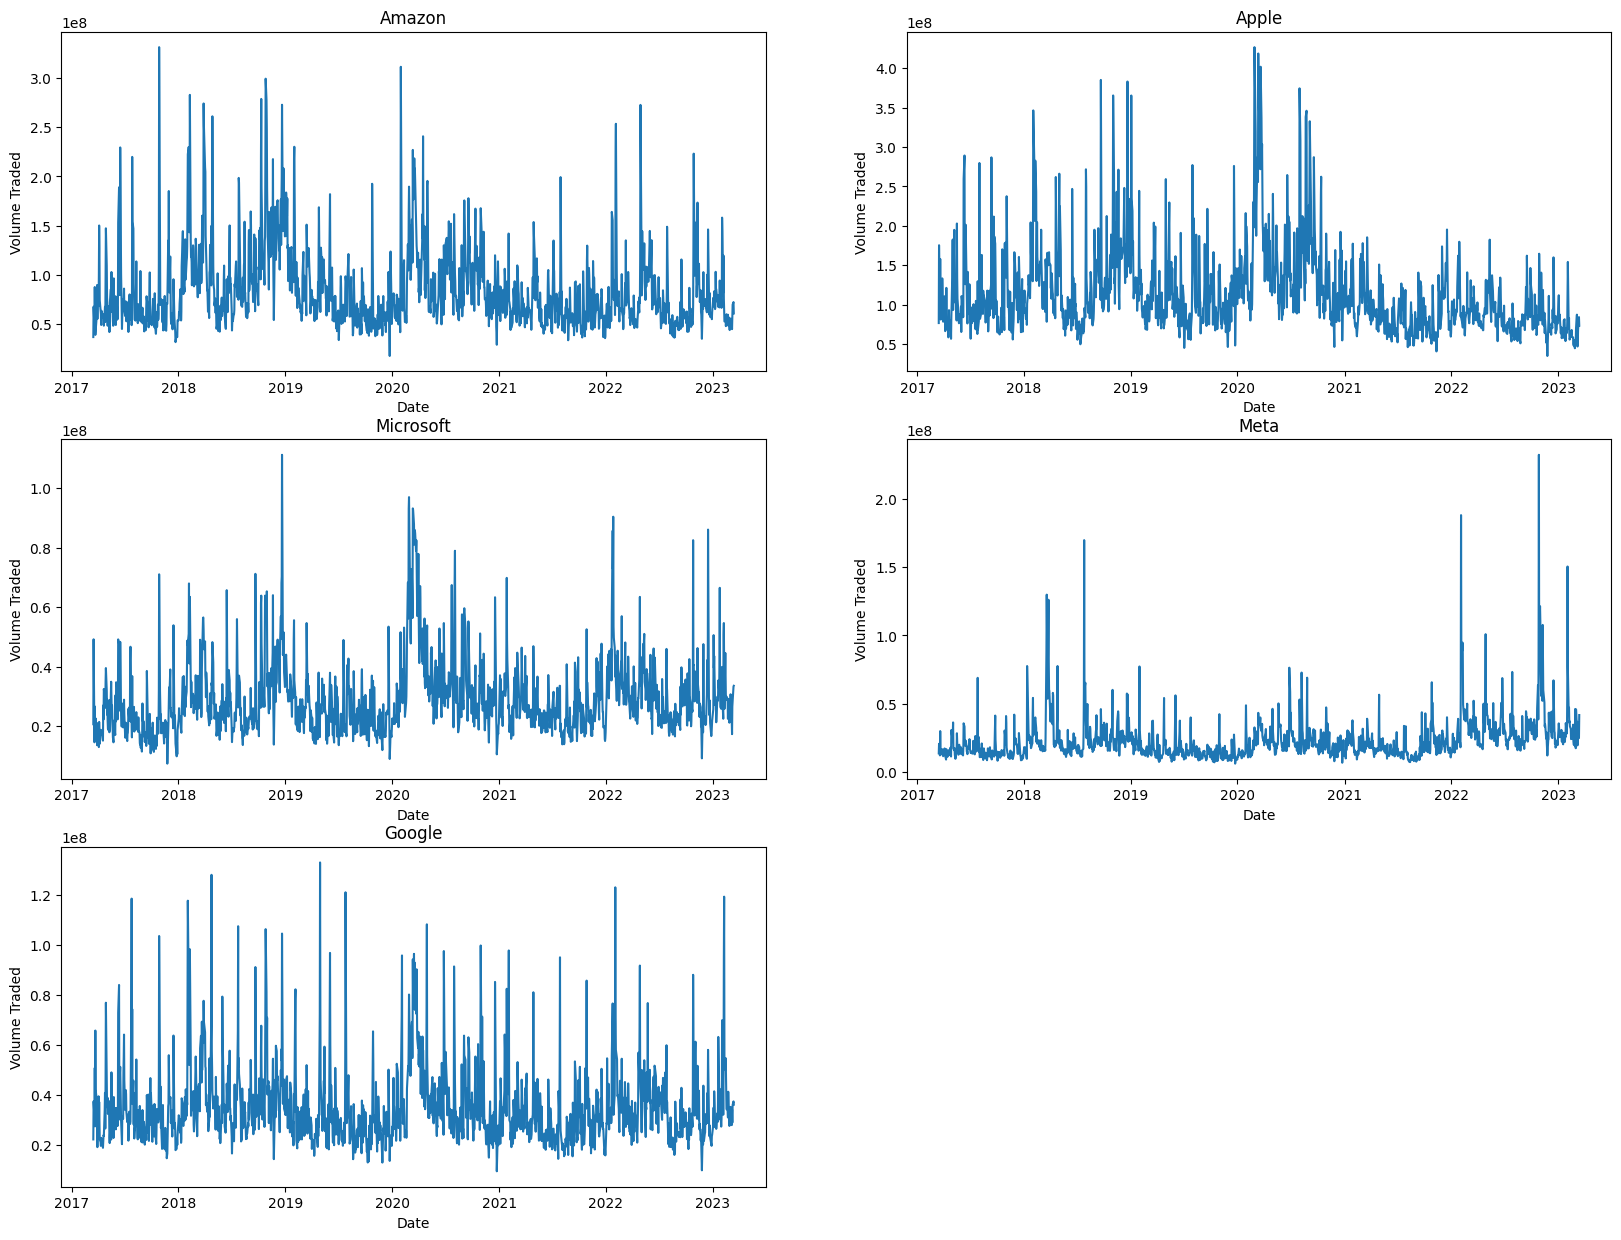

In [10]:
#If we want to analyse the total volume of the stock traded we can do that by plotting it 

plt.figure(figsize=(20, 15))
for index, company in enumerate(Company):
    plt.subplot(3, 2, index+1)
    plt.plot(company.index, company["Volume"])
    plt.title(Title[index])
    plt.ylabel('Volume Traded')
    plt.xlabel('Date')

Calculating Moving Average of the Adjusted Closing Prices for the companies 

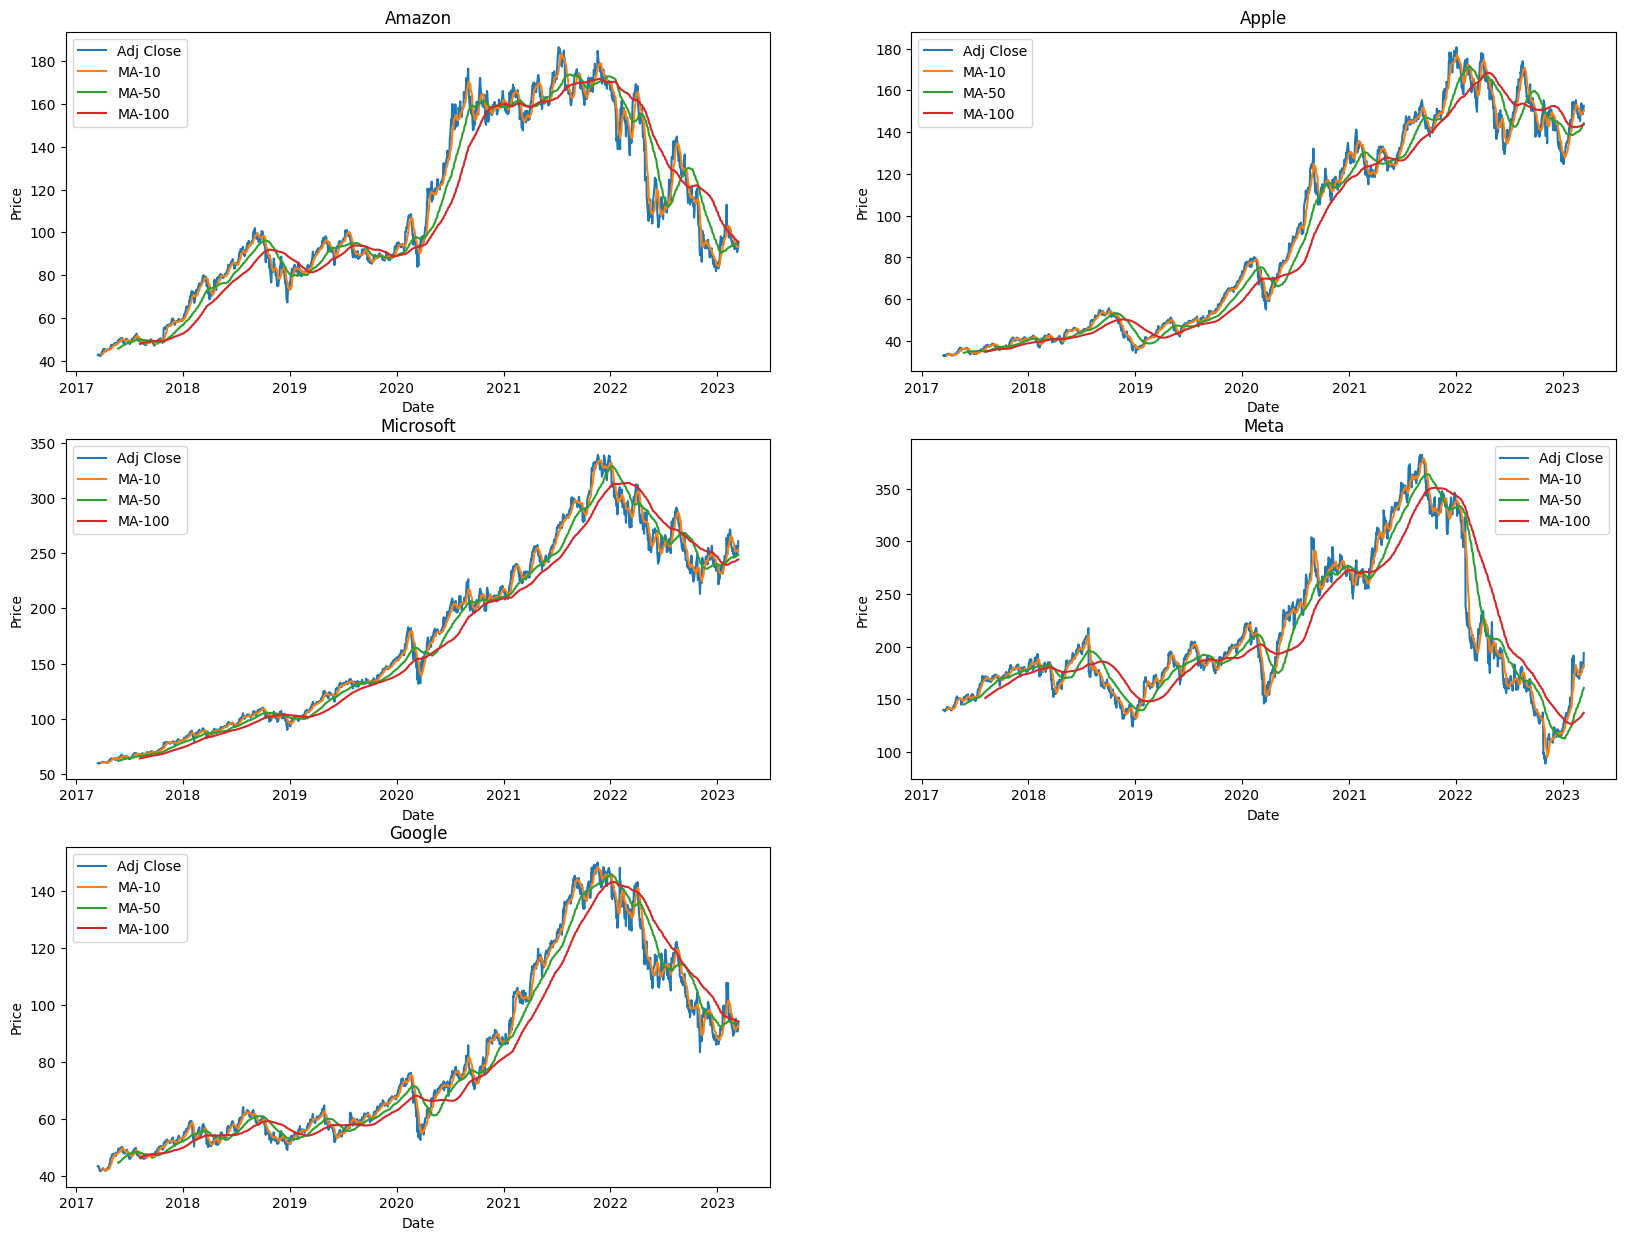

In [11]:
# #Using Technical Indicators
# # Create lagged variables for the Open price
# for i in range(1, 4):
#     data[f"Open Lag {i}"] = data["Open"].shift(i)

# # Calculate the moving averages of the Open price
MA = [10, 50, 100]

for company in Company:
    for ma in MA:
        col = f'Moving Average for {ma} days'
        company[col] = company['Adj Close'].rolling(window=ma).mean()

plt.figure(figsize=(20, 15))
for index, company in enumerate(Company):
    plt.subplot(3, 2, index + 1)
    plt.plot(company['Date'], company['Adj Close'], label='Adj Close')
    plt.plot(company['Date'], company['Moving Average for 10 days'], label='MA-10') 
    plt.plot(company['Date'], company['Moving Average for 50 days'], label='MA-50')
    plt.plot(company['Date'], company['Moving Average for 100 days'], label='MA-100') 
    plt.title(Title[index])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

 

# # Create the response variable (Open) and the predictor variables
# y = data["Open"]
# X = data.drop(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

Calculating the RSI 

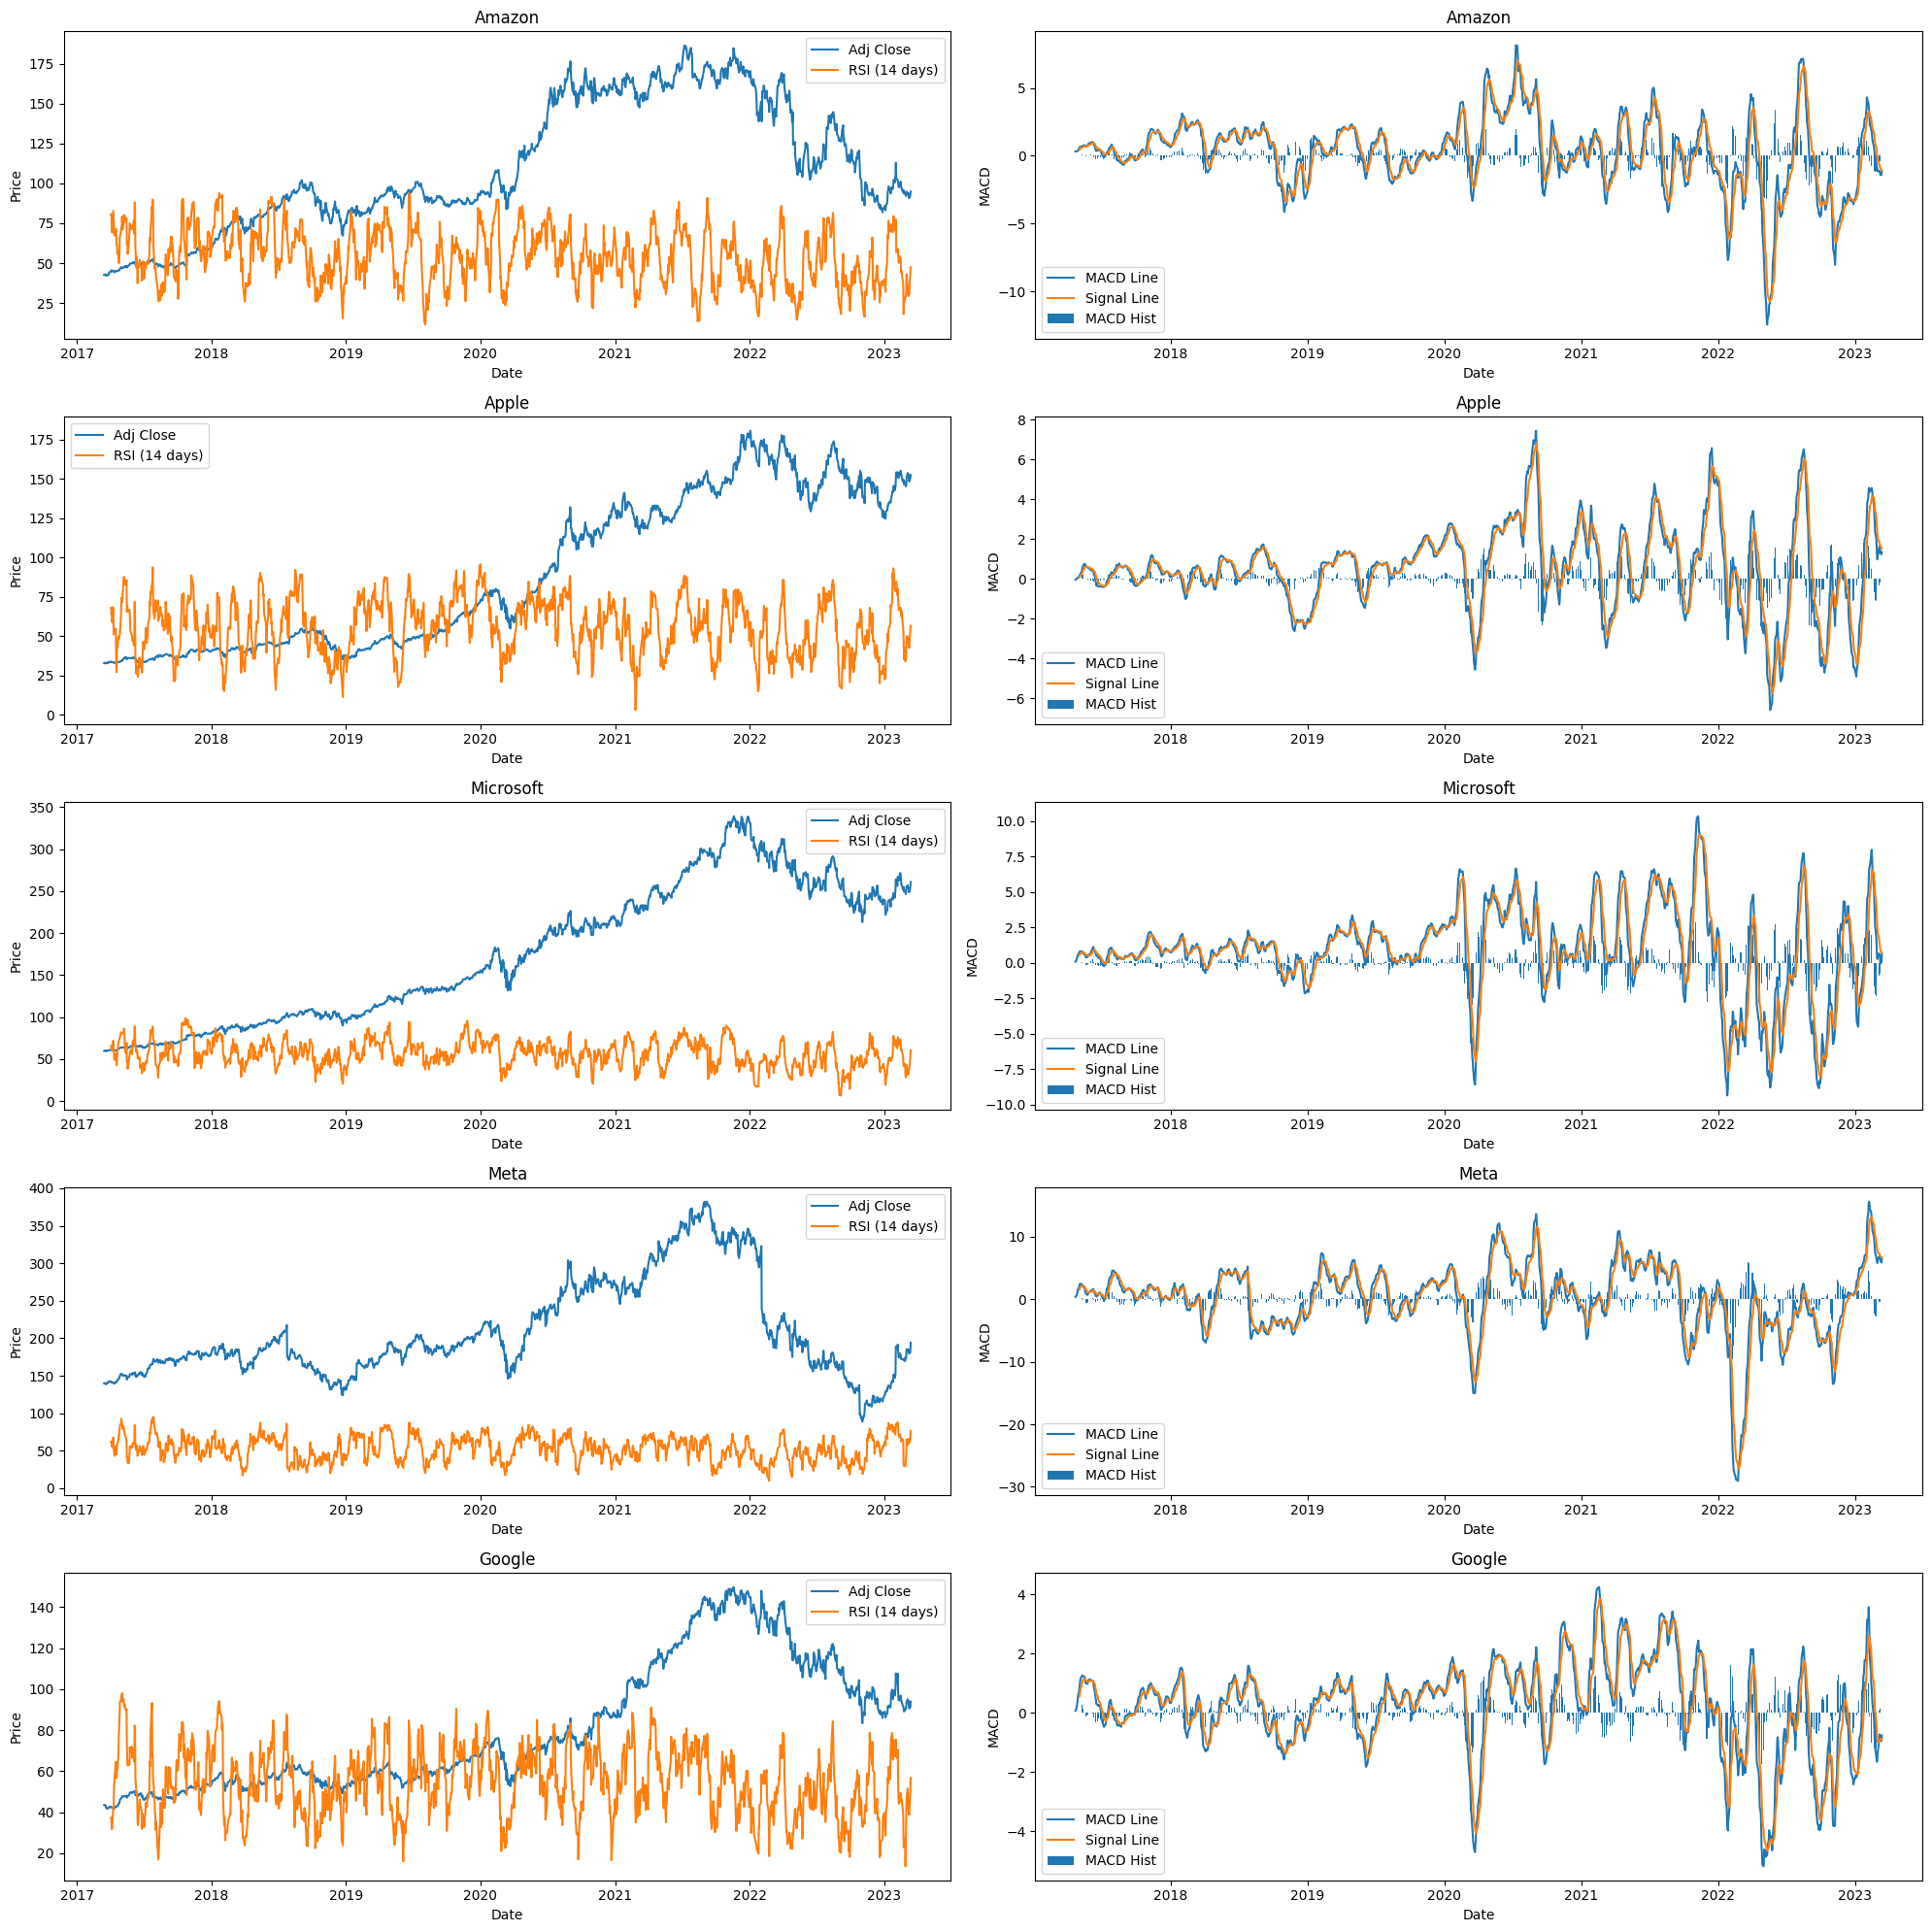

In [12]:
def RSI(data, period=14):
    """
    Calculate Relative Strength Index (RSI) for given data.

    data : pandas Series
        Close price data.
    rsi_period : int
        Length of the RSI calculation window.

    Returns
    -------
    rsi : pandas Series
        Calculated RSI values.
    """
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean().abs()
    relative_strength = avg_gain / avg_loss
    rsi = 100.0 - (100.0 / (1.0 + relative_strength))
    return rsi

# Define the function to calculate MACD
def calculate_macd(data, n_fast=12, n_slow=26):
    # Calculate the fast and slow exponential moving averages
    ema_fast = data.ewm(span=n_fast, min_periods=n_slow).mean()
    ema_slow = data.ewm(span=n_slow, min_periods=n_slow).mean()

    # Calculate the MACD line and the signal line
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=9, min_periods=8).mean()

    # Calculate the MACD histogram
    macd_hist = macd_line - signal_line

    return macd_line, signal_line, macd_hist

# Define the period for RSI calculation and MACD calculation
rsi_period = 14
macd_fast = 12
macd_slow = 26

# Calculate RSI and MACD for each company
for company in Company:
    company['RSI'] = RSI(company['Adj Close'], period=rsi_period)
    macd_line, signal_line, macd_hist = calculate_macd(company['Adj Close'], n_fast=macd_fast, n_slow=macd_slow)
    company['MACD Line'] = macd_line
    company['Signal Line'] = signal_line
    company['MACD Hist'] = macd_hist

# Plot adjusted close price, RSI, and MACD for each company
plt.figure(figsize=(20, 20))
for index, company in enumerate(Company):
    plt.subplot(5, 2, 2 * index + 1)
    plt.plot(company['Date'], company['Adj Close'], label='Adj Close')
    plt.plot(company['Date'], company['RSI'], label=f'RSI ({rsi_period} days)')
    plt.title(Title[index])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    plt.subplot(5, 2, 2 * index + 2)
    plt.plot(company['Date'], company['MACD Line'], label='MACD Line')
    plt.plot(company['Date'], company['Signal Line'], label='Signal Line')
    plt.bar(company['Date'], company['MACD Hist'], label='MACD Hist')
    plt.title(Title[index])
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend()
    
plt.tight_layout()
plt.show()


1. The above plot shows the Relative Strength Index for each company using the adjusted close price data. If the RSI value for a company is above 70- it indicated that it is a good time for selling stocks and below 30 indicated good time to consider for buying a stock.
2. From the RSI graphs, we can see the overbought and oversold conditions of each company's stock, based on the RSI value.
3. From the MACD graphs, we can see the trend of each company's stock momentum, as well as the buy and sell signals that can be derived from the MACD Line and Signal Line crossovers. The MACD Histogram also provides an indication of the strength of the trend, with positive values indicating an uptrend and negative values indicating a downtrend.

Scaling and Normalizing the Data for each company

In [13]:
# Scale and normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
company[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'MACD Line', 'Signal Line', 'MACD Hist']] = scaler.fit_transform(company[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'MACD Line', 'Signal Line', 'MACD Hist']])
    
# Create the response variable (Open) and the predictor variables
response_var = company[['Open']].values
predictor_vars = company[['High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'MACD Line', 'Signal Line', 'MACD Hist']].values
    

Splitting the Dataset into Training(70%), Test(15%) and Validation Set(15%)

In [15]:

# # Split the data into training, validation, and test sets
# train_size = int(len(response_var) * 0.7)
# val_size = int(len(response_var) * 0.15)
# test_size = len(response_var) - train_size - val_size

# X_train = predictor_vars[:train_size]
# y_train = response_var[:train_size]

# X_val = predictor_vars[train_size:train_size+val_size]
# y_val = response_var[train_size:train_size+val_size]

# X_test = predictor_vars[train_size+val_size:]
# y_test = response_var[train_size+val_size:]

# # Combine predictor and response variables
# all_vars = np.concatenate((predictor_vars, response_var), axis=1)

# # Split data into training, validation, and test sets
# train_x, val_x, test_x = all_vars[0:train_size, :-1], all_vars[train_size:train_size+val_size, :-1], all_vars[train_size+val_size:, :-1]
# train_y, val_y, test_y = all_vars[0:train_size, -1], all_vars[train_size:train_size+val_size, -1], all_vars[train_size+val_size:, -1]

# # Print the shapes of the training, validation, and test sets
# print("Training set:", train_x.shape, train_y.shape)
# print("Validation set:", val_x.shape, val_y.shape)
# print("Test set:", test_x.shape, test_y.shape)

Training set: (1056, 9) (1056,)
Validation set: (226, 9) (226,)
Test set: (227, 9) (227,)


Reshaping the Data

In [16]:
# # Reshape the predictor variables
# train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
# val_x = val_x.reshape((val_x.shape[0], 1, val_x.shape[1]))
# test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

# # Reshape the response variable
# train_y = train_y.reshape((train_y.shape[0], 1))
# val_y = val_y.reshape((val_y.shape[0], 1))
# test_y = test_y.reshape((test_y.shape[0], 1))


In [18]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from math import sqrt
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Dropout
# from keras.optimizers import Adam

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50))
# model.add(Dropout(0.2))
# model.add(Dense(1))

# # Compile the model
# adam = Adam(learning_rate=0.001)
# model.compile(loss='mean_squared_error', optimizer=adam)

# # Print the shape of the data before fitting the model
# print("train_x shape:", train_x.shape)
# print("train_y shape:", train_y.shape)
# print("val_x shape:", val_x.shape)
# print("val_y shape:", val_y.shape)

# # Fit the model to the training data
# history = model.fit(train_x, train_y, epochs=100, batch_size=16, validation_data=(val_x, val_y), verbose=2, shuffle=False)

# # Evaluate the model on the test data
# y_pred = model.predict(test_x)
# rmse = sqrt(mean_squared_error(test_y, y_pred))
# mae = mean_absolute_error(test_y, y_pred)
# mse = mean_squared_error(test_y, y_pred)

# print("RMSE:", rmse)
# print("MAE:", mae)
# print("MSE:", mse)


train_x shape: (1056, 1, 9)
train_y shape: (1056, 1)
val_x shape: (226, 1, 9)
val_y shape: (226, 1)
Epoch 1/100
66/66 - 3s - loss: nan - val_loss: nan - 3s/epoch - 42ms/step
Epoch 2/100
66/66 - 0s - loss: nan - val_loss: nan - 132ms/epoch - 2ms/step
Epoch 3/100
66/66 - 0s - loss: nan - val_loss: nan - 135ms/epoch - 2ms/step
Epoch 4/100
66/66 - 0s - loss: nan - val_loss: nan - 131ms/epoch - 2ms/step
Epoch 5/100
66/66 - 0s - loss: nan - val_loss: nan - 127ms/epoch - 2ms/step
Epoch 6/100
66/66 - 0s - loss: nan - val_loss: nan - 125ms/epoch - 2ms/step
Epoch 7/100
66/66 - 0s - loss: nan - val_loss: nan - 129ms/epoch - 2ms/step
Epoch 8/100
66/66 - 0s - loss: nan - val_loss: nan - 130ms/epoch - 2ms/step
Epoch 9/100
66/66 - 0s - loss: nan - val_loss: nan - 130ms/epoch - 2ms/step
Epoch 10/100
66/66 - 0s - loss: nan - val_loss: nan - 126ms/epoch - 2ms/step
Epoch 11/100
66/66 - 0s - loss: nan - val_loss: nan - 126ms/epoch - 2ms/step
Epoch 12/100
66/66 - 0s - loss: nan - val_loss: nan - 123ms/epoc

ValueError: Input contains NaN.